In [2]:
import tensorflow as tf
import numpy as np
import IPython.display as display
import PIL.Image
import time
from tensorflow.keras.preprocessing import image
#图像标准化
def normalize_image(img):
    img = 255*(img + 1.0)/2.0
    return tf.cast(img,tf.uint8)
#图像可视化
def show_image(img):
    display.display(PIL.Image.fromarray(np.array(img)))
#保存图像文件
def save_image(img,file_name):
    PIL.Image.fromarray(np.array(img)).save(file_name)

base_model=tf.keras.applications.InceptionV3(include_top=False, weights='imagenet')
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, None, None, 3 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, None, None, 3 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [3]:
base_model.summary()
layer_names='conv2d_85'
layers=base_model.get_layer(layer_names).output
dream_model = tf.keras.Model(inputs=base_model.input,outputs=layers)
dream_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, None, None, 3 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, None, None, 3 0           batch_normalization[0][0]        
_______________________________________________________________________________________

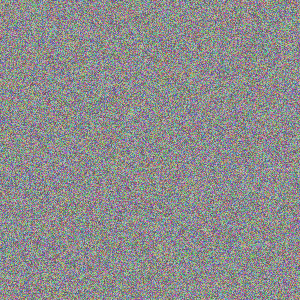

开始做梦......
Step 10 / 100, loss 0.5290606021881104
Step 20 / 100, loss 1.152485966682434
Step 30 / 100, loss 1.3746447563171387
Step 40 / 100, loss 1.7076761722564697
Step 50 / 100, loss 2.103461265563965
Step 60 / 100, loss 2.358419895172119
Step 70 / 100, loss 2.6175851821899414
Step 80 / 100, loss 2.8282546997070312
Step 90 / 100, loss 3.1056556701660156
Step 100 / 100, loss 3.306941509246826
梦醒时分......


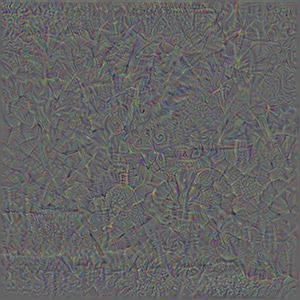

In [4]:
#计算损失
def calc_loss(img,model):
    channel=13
    img=tf.expand_dims(img,axis=0)
    layer_activations=model(img)
    act=layer_activations[:,:,:,channel]
    loss=tf.math.reduce_mean(act)
    return loss
#定义图像优化过程函数
def render_deepdream(model,img,steps=100,step_size=0.01,verbose=1):
    for n in tf.range(steps):
        with tf.GradientTape() as tape:
            tape.watch(img)
            loss=calc_loss(img,model)
        gradients=tape.gradient(loss,img)
        gradients/=tf.math.reduce_std(gradients) + 1e-8
        img=img+gradients*step_size
        img=tf.clip_by_value(img,-1,1)
        if(verbose==1):
            if((n+1)%10==0):
                print("Step {} / {}, loss {}".format(n+1,steps,loss))
    return img
#定义噪声图像
img_noise=np.random.uniform(size=(300,300,3))+100.0
img_noise=img_noise.astype(np.float32)
show_image(normalize_image(img_noise))
img=tf.keras.applications.inception_v3.preprocess_input(img_noise)
img=tf.convert_to_tensor(img)
#开始做梦
start=time.time()
print("开始做梦......")
dream_img=render_deepdream(dream_model,img,steps=100,step_size=0.01)
end=time.time()
end-start
print("梦醒时分......")
dream_img=normalize_image(dream_img)
show_image(dream_img)